# Day 22

In [53]:
import re

def getNodes(filename):
    f = open(filename)
    values = re.compile(r'\d+')
    nodes = {}
    for l in f.readlines():
        v = [ int(d) for d in re.findall(values,l) ]
        if len(v):
            nodes[(v[0],v[1])] = (v[2],v[3],v[4]) # Size  Used  Avail
    return(nodes)

## Part 1

In [54]:
nodes = getNodes("data/input22.txt")

pairs = []

for n in nodes.keys():
    for m in nodes.keys():
        if m==n:
            continue
        if nodes[n][1]>0 and nodes[n][1]<nodes[m][2]: # Size(n)>0 and Size(n) < Avail(n):
            pairs.append((n,m))
            
print(len(pairs))

946


## Part 2

Solving it by hand!

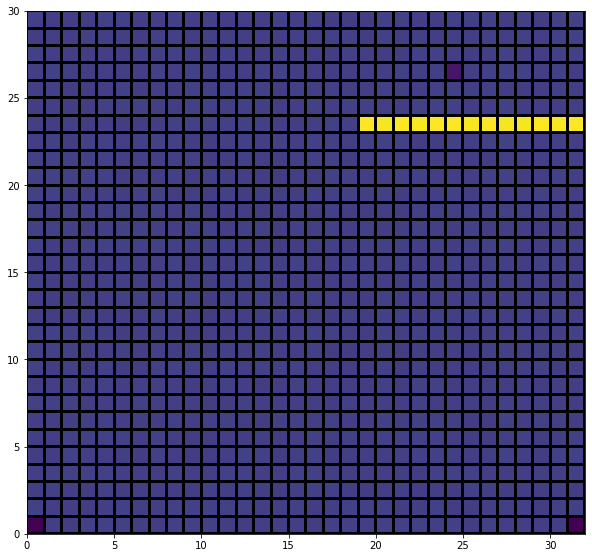

In [56]:
import numpy as np
import matplotlib.pyplot as plt

X = [ x for x,y in nodes.keys() ]
Y = [ y for x,y in nodes.keys() ]
min(X),max(X),min(Y),max(Y)

grid = np.zeros((max(Y)-min(Y)+1,max(X)-min(Y)+1),dtype=int)

for n in nodes.keys():
    x,y = n
    grid[y][x] = nodes[n][1]
    if n == (0,0): grid[y][x]=-30
    if n == (max(X),0): grid[y][x]=-30


plt.figure(figsize=(10,10))
#plt.imshow(grid)

plt.pcolormesh(grid, edgecolors='k', linewidth=2)
ax = plt.gca()
ax.set_aspect('equal')

In [60]:
# steps to move space to (0,31) in front of data to be moved from (0,32) to (0,5)
s = 6 + 26 + 12 

# 1 step to flip space behind data at (0,32) and data in space position (0,31)
s += 1

# 4 steps to move space from in front of data again (e.g. to 0,2) + 1 to swap data with space = 5 moves
# to be repeated 
s += 5 * 30

print(s)

195
